In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [35]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [3]:
#read the csv files
spam_df= pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

In [4]:
#first five rows of this dataset
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
spam_df.shape

(5572, 3)

In [5]:
#Drop the garbage column
spam_df= spam_df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [6]:
#check again the dataframe
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#rename the columns
spam_df.columns=['labels','data']

In [8]:
spam_df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#create binary labels[0 and 1]
spam_df['b_labels']=spam_df['labels'].map({'ham':0,'spam':1})
y=spam_df['b_labels'].values

In [18]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(spam_df['data'],y,test_size=0.33)

In [12]:
#convert sentences to sequences
max_vocab_size=20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [14]:
tokenizer.fit_on_texts(x_train)

In [15]:
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [16]:
sequence_train[0]

[121, 379, 61, 1, 971, 443, 2309, 52, 125, 26, 3478, 13, 316]

In [20]:
x_train

5097    Sorry about that this is my mates phone and i ...
352     TODAY is Sorry day.! If ever i was angry with ...
608                                   Neva mind it's ok..
3447    Its  &lt;#&gt; k here oh. Should i send home f...
1423                     Lol great now im getting hungry.
                              ...                        
5346    My Parents, My Kidz, My Friends n My Colleague...
1709    U meet other fren dun wan meet me ah... Muz b ...
4950    hi baby im sat on the bloody bus at the mo and...
4885                               Or just do that 6times
3521    Im sorry bout last nite it wasnåÕt ur fault it...
Name: data, Length: 3733, dtype: object

In [21]:
len(sequence_train[0])

13

In [22]:
len(sequence_train[1])

8

In [23]:
#convert sentences to sequences
max_vocab_size=20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [24]:
#check word index mapping (to check the number of words in vocabulary)
word2idx= tokenizer.word_index
V = len(word2idx)
print('Total numbert of unique tokens are %s' %V)

Total numbert of unique tokens are 7154


In [25]:
#pad sequences (to get N X T matrix)
data_train= pad_sequences(sequence_train)
print('Shape of data train tensor',data_train.shape)

Shape of data train tensor (3733, 162)


In [27]:
#set the value of T to get sequence length
T = data_train.shape[1]
print(T)

162


In [28]:
#pad the test
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   76,   75,   18,   

In [30]:
#pad the test set
data_set = pad_sequences(sequence_test, maxlen=T)
print('Shape of data set tensor:',data_set.shape)

Shape of data set tensor: (1839, 162)


# Building the Model

In [37]:
#create the model
#choose embedding dimensionality
D =20
#input layer
i= Input(shape=(T,)) #input layer takes in sequences of integers, so shape is T
#Embedding layer
x= Embedding(V+1,D)(i) # This takes in sequences of integerrs and returns sequences of word vectors
#This will be an N *T *D array
# we want size of embedding to (V+1) x D, because first word index starts from 1 and not 0
# First CNN layer
x= Conv1D(32, 3, activation='relu')(x)
x= MaxPooling1D(3)(x)

# Second CNN layer
x= Conv1D(64, 3, activation='relu')(x)
x= MaxPooling1D(3)(x)

# Third CNN layer
x= Conv1D(128, 3, activation='relu')(x)
x= GlobalMaxPooling1D()(x)

# Dense layer
x= Dense(1, activation='sigmoid')(x)

#create the model
model= Model(i,x)

In [38]:
#complie the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
# train the model
r = model.fit(x=data_train,y=y_train,epochs=5, validation_data=(data_set, y_test))

Epoch 1/5
117/117 [==============================] - 4s 21ms/step - loss: 0.3880 - accuracy: 0.8572 - val_loss: 0.2228 - val_accuracy: 0.8760
Epoch 2/5
117/117 [==============================] - 2s 19ms/step - loss: 0.1107 - accuracy: 0.9628 - val_loss: 0.0576 - val_accuracy: 0.9848
Epoch 3/5
117/117 [==============================] - 3s 21ms/step - loss: 0.0201 - accuracy: 0.9928 - val_loss: 0.0413 - val_accuracy: 0.9908
Epoch 4/5
117/117 [==============================] - 3s 26ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.0418 - val_accuracy: 0.9924
Epoch 5/5
117/117 [==============================] - 2s 19ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0441 - val_accuracy: 0.9918


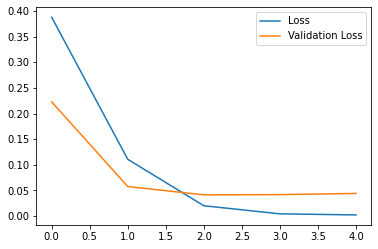

In [41]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

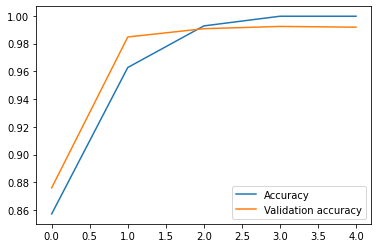

In [42]:
#accuracy per iteration
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()